In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Newton's Method for Optimization is used to find local minima of a twice differentiable function.
# It utilizes both the gradient and the Hessian matrix to take more informed steps, potentially
# converging faster compared to gradient-based methods alone. The steps are:
# 1. Start with an initial guess for the variable(s) to optimize.
# 2. Calculate the gradient (first derivative) and Hessian (second derivative) at the current point.
# 3. Solve for the step direction using the equation: (𝛻2𝑓(𝑥𝑘) + 𝜆𝐼)𝛿 = −𝛻𝑓𝑥, that is: (Hessian + λI)δ = -Gradient
#    - λ is a damping factor to handle cases where the Hessian is not positive definite.
# 4. Update the variables using the step direction.
# 5. Repeat until the gradient norm is sufficiently small, indicating convergence.

class NewtonsMethod:
    def __init__(self, damping_factor=1e-3, epsilon=1e-6):
        self.damping_factor = damping_factor
        self.epsilon = epsilon
        self.x_history = []
        self.cost_history = []

    def cost_function(self, x):
        # Rosenbrock's valley: f(x, y) = (a - x)^2 + b * (y - x^2)^2
        a = 1
        b = 100
        return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

    def gradient(self, x):
         # Gradient of the Rosenbrock function:
        # df/dx = -2(a - x) - 4b * x * (y - x^2)
        # df/dy = 2b * (y - x^2)
        a = 1
        b = 100
        grad = np.zeros_like(x)
        grad[0] = -2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
        grad[1] = 2 * b * (x[1] - x[0]**2)
        return grad

    def hessian(self, x):
        a = 1
        b = 100
        H = np.zeros((2, 2))
        H[0, 0] = 2 - 4 * b * (x[1] - x[0]**2) + 8 * b * x[0]**2  # ∂²f/∂x²
        H[0, 1] = H[1, 0] = -4 * b * x[0]  # ∂²f/∂x∂y = ∂²f/∂y∂x
        H[1, 1] = 2 * b  # ∂²f/∂y²
        return H


    def fit(self, initial_x):
        x = initial_x
        grad = self.gradient(x)

        while np.linalg.norm(grad) > self.epsilon:
            grad = self.gradient(x)
            hess = self.hessian(x)

            # Ensure the Hessian is positive definite by adding the damping factor if needed
            eigenvalues = np.linalg.eigvals(hess)
            if np.any(eigenvalues <= 0):
                hess += self.damping_factor * np.eye(len(x))

            # Solve the linear system: (Hessian + λI) * delta = -Gradient
            delta = np.linalg.solve(hess, -grad)

            self.x_history.append(x.copy())
            cost = self.cost_function(x)
            self.cost_history.append(cost)

            # Update x
            x += delta

        return x


Optimized x: [1. 1.]


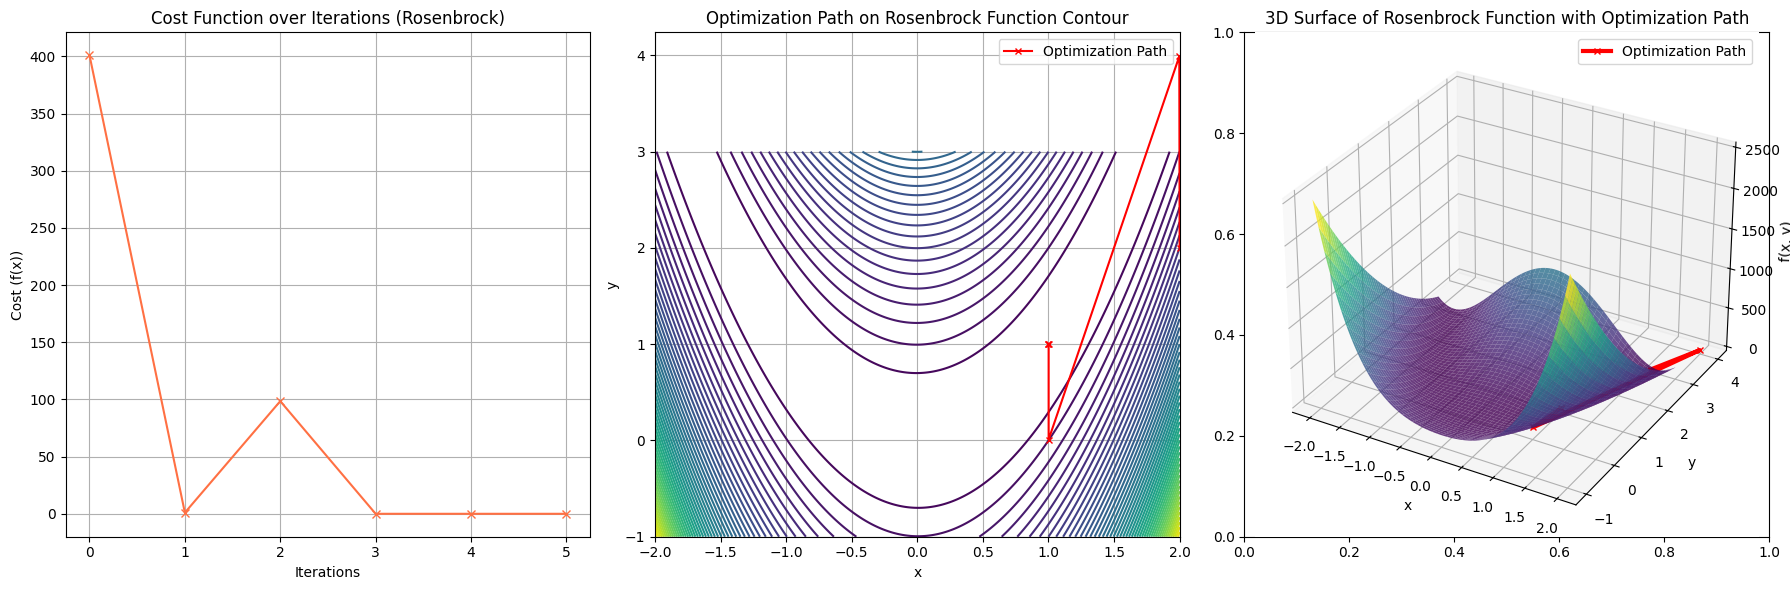

In [10]:
if __name__ == "__main__":
    newton = NewtonsMethod(epsilon=1e-6)

    initial_x = np.array([2.0, 2.0])
    optimized_x = newton.fit(initial_x)

    print("Optimized x:", optimized_x)

    # Define x_vals and y_vals for the contour and 3D plots
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = (1 - X)**2 + 100 * (Y - X**2)**2

    # Create a figure with 3 subplots
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # 1. Plot Cost Function over Iterations
    ax[0].plot(newton.cost_history, color='#FF7043', marker='x')
    ax[0].set_title('Cost Function over Iterations (Rosenbrock)')
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Cost (f(x))')
    ax[0].grid(True)

    # 2. Plot Optimization Path on Contour of Rosenbrock Function
    ax[1].contour(X, Y, Z, 50, cmap='viridis')
    ax[1].plot([x[0] for x in newton.x_history], [x[1] for x in newton.x_history], color='r', marker='x', markersize=5, linestyle='-', label="Optimization Path")
    ax[1].set_title('Optimization Path on Rosenbrock Function Contour')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].legend()
    ax[1].grid(True)

    # 3. Plot 3D Surface of Rosenbrock Function with Optimization Path
    ax[2] = fig.add_subplot(133, projection='3d')
    ax[2].view_init(elev=30, azim=-60)
    ax[2].plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    ax[2].plot([x[0] for x in newton.x_history], [x[1] for x in newton.x_history],
               [newton.cost_function(x) for x in newton.x_history], color='r', marker='x', markersize=5, label="Optimization Path", linestyle='-', linewidth=3)

    ax[2].set_title('3D Surface of Rosenbrock Function with Optimization Path')
    ax[2].set_xlabel('x')
    ax[2].set_ylabel('y')
    ax[2].set_zlabel('f(x, y)')
    ax[2].legend()

    # Display all the plots
    plt.tight_layout()
    plt.show()
